## G2M Insights for Cab Investement

### This script contains insights drawn from that data of two cab companies; Pink Cab and Yellow Cab over a period of two years (2016 to 2018). We would look at in depth analysis to help make informed decision on which company might be better to invest in by our client XYZ.

#### First thing is to import the necessary libraries that would be neede for this analysis

In [1]:
# Import Libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # MATLAB-like way of plotting
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

from mpl_toolkits.mplot3d import Axes3D

#### Loading the datasets

In [2]:
# Load Datasets
cab_df = pd.read_csv("Cab_Data.csv")
cust_df = pd.read_csv("Customer_ID.csv")
trans_df = pd.read_csv("Transaction_ID.csv")
city_df = pd.read_csv("City.csv") 

In [3]:
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
num_rows, num_columns = cab_df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 359392
Number of columns: 7


In [5]:
cust_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [6]:
num_rows, num_columns = cust_df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 49171
Number of columns: 4


In [7]:
trans_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [8]:
num_rows, num_columns = trans_df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 440098
Number of columns: 3


In [9]:
city_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [10]:
num_rows, num_columns = city_df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 20
Number of columns: 3


In [11]:
# Merge: Transaction + Customer
merged = pd.merge(trans_df, cust_df, how='left', on='Customer ID')

# Merge: Add cab data
merged = pd.merge(merged, cab_df, how='left', on='Transaction ID')

# Merge: Add city data
merged = pd.merge(merged, city_df, how='left', on='City')

In [12]:
merged.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,29290,Card,Male,28,10813,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701"
1,10000012,27703,Card,Male,27,9237,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701"
2,10000013,28712,Cash,Male,53,11242,42371.0,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701"
3,10000014,28020,Cash,Male,23,23327,42376.0,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701"
4,10000015,27182,Card,Male,33,8536,42372.0,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701"


In [13]:
# Convert Date column from Excel series to datetime
merged["Date of Travel"] = pd.to_datetime(merged["Date of Travel"] - 2, origin='1899-12-30', unit='D')

In [14]:
merged.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,29290,Card,Male,28,10813,2016-01-06,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701"
1,10000012,27703,Card,Male,27,9237,2016-01-04,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701"
2,10000013,28712,Cash,Male,53,11242,2015-12-31,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701"
3,10000014,28020,Cash,Male,23,23327,2016-01-05,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701"
4,10000015,27182,Card,Male,33,8536,2016-01-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701"


In [15]:
# Calculate profit
merged["Profit"] = merged["Price Charged"] - merged["Cost of Trip"]

In [16]:
merged.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Profit
0,10000011,29290,Card,Male,28,10813,2016-01-06,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",57.315
1,10000012,27703,Card,Male,27,9237,2016-01-04,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",23.666
2,10000013,28712,Cash,Male,53,11242,2015-12-31,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",27.568
3,10000014,28020,Cash,Male,23,23327,2016-01-05,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",25.798
4,10000015,27182,Card,Male,33,8536,2016-01-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",16.844


### Checking basic statistics of the data

In [17]:
#Basic stats

print(merged.info(), '\n')
print(merged.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440098 entries, 0 to 440097
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      440098 non-null  int64         
 1   Customer ID         440098 non-null  int64         
 2   Payment_Mode        440098 non-null  object        
 3   Gender              440098 non-null  object        
 4   Age                 440098 non-null  int64         
 5   Income (USD/Month)  440098 non-null  int64         
 6   Date of Travel      359392 non-null  datetime64[ns]
 7   Company             359392 non-null  object        
 8   City                359392 non-null  object        
 9   KM Travelled        359392 non-null  float64       
 10  Price Charged       359392 non-null  float64       
 11  Cost of Trip        359392 non-null  float64       
 12  Population          359392 non-null  object        
 13  Users               359392 no

In [18]:
# checking for missing values in each column or series
merged.isna().sum() #you can also use merged.isnull().sum()

Transaction ID            0
Customer ID               0
Payment_Mode              0
Gender                    0
Age                       0
Income (USD/Month)        0
Date of Travel        80706
Company               80706
City                  80706
KM Travelled          80706
Price Charged         80706
Cost of Trip          80706
Population            80706
Users                 80706
Profit                80706
dtype: int64

In [19]:
#checking the total columns with missing values
merged.isna().any(axis = 0).sum()

9

In [20]:
#checking the total rows with missing values
merged.isna().any(axis = 1).sum()

80706

In [21]:
missing = merged[merged.isna().any(axis = 1)]
print(missing.shape)
missing

(80706, 15)


,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Profit
192,10000203,43177,Card,Male,52,3266,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,10000204,44348,Cash,Male,22,29304,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,10000205,44599,Cash,Male,35,5157,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,10000206,44264,Cash,Male,41,13981,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,10000207,43369,Cash,Male,31,18561,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440067,10440078,51612,Cash,Female,58,2685,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
440080,10440091,53963,Card,Male,43,22235,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
440091,10440102,52526,Cash,Female,37,21022,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
440092,10440103,53171,Card,Female,39,10212,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### A decision was made to drop rows with null 'NAN' values based on the fact that these values cannot be filled up and their number which is 80,706 (18.3%) out of the total number of rows (440098) is significantly small compared to what would be left which is 359,392 (81.7%)

In [22]:
#drop all missing values
cleaned_df = merged.dropna()

In [23]:
# checking for missing values in each column or series
cleaned_df.isna().sum() #you can also use cleaned_df.isnull().sum()

Transaction ID        0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Population            0
Users                 0
Profit                0
dtype: int64

In [24]:
#checking for duplicates
len(cleaned_df[cleaned_df.duplicated()])

0

In [25]:
print(cleaned_df.info(), '\n')
print(cleaned_df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 440096
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Customer ID         359392 non-null  int64         
 2   Payment_Mode        359392 non-null  object        
 3   Gender              359392 non-null  object        
 4   Age                 359392 non-null  int64         
 5   Income (USD/Month)  359392 non-null  int64         
 6   Date of Travel      359392 non-null  datetime64[ns]
 7   Company             359392 non-null  object        
 8   City                359392 non-null  object        
 9   KM Travelled        359392 non-null  float64       
 10  Price Charged       359392 non-null  float64       
 11  Cost of Trip        359392 non-null  float64       
 12  Population          359392 non-null  object        
 13  Users               359392 no

In [26]:
cleaned_df.describe()

,Transaction ID,Customer ID,Age,Income (USD/Month),KM Travelled,Price Charged,Cost of Trip,Profit
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,19191.652115,35.336705,15048.822937,22.567254,423.443311,286.190113,137.253198
std,1.268058e+05,21012.412463,12.594234,7969.409482,12.233526,274.378911,157.993661,160.311840
min,1.000001e+07,1.000000,18.000000,2000.000000,1.900000,15.600000,19.000000,-220.060000
25%,1.011081e+07,2705.000000,25.000000,8424.000000,12.000000,206.437500,151.200000,28.012000
50%,1.022104e+07,7459.000000,33.000000,14685.000000,22.440000,386.360000,282.480000,81.962000
75%,1.033094e+07,36078.000000,42.000000,21035.000000,32.960000,583.660000,413.683200,190.030000
max,1.044011e+07,60000.000000,65.000000,35000.000000,48.000000,2048.030000,691.200000,1463.966000


In [27]:
cleaned_df.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Profit
0,10000011,29290,Card,Male,28,10813,2016-01-06,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",57.315
1,10000012,27703,Card,Male,27,9237,2016-01-04,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",23.666
2,10000013,28712,Cash,Male,53,11242,2015-12-31,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",27.568
3,10000014,28020,Cash,Male,23,23327,2016-01-05,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",25.798
4,10000015,27182,Card,Male,33,8536,2016-01-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",16.844


### Further cleaning the data and adding new columns to enhance the analysis

In [28]:
# creating a new column 'Age Group' by grouping the age

# firstly define the bins and corresponding labels
# 18-39: Younger, 40-59: Middle Age, 60-65: Older
bins = [18, 40, 60, 66]  
labels = ['Younger', 'Middle Age', 'Older']

# Creating a new column 'Age Group' in the final_data DataFrame
cleaned_df['Age Group'] = pd.cut(cleaned_df['Age'], bins=bins, labels=labels, right=False)

# Display the first five rows to check the new column
print(cleaned_df[['Age', 'Age Group']].head())

   Age   Age Group
0   28     Younger
1   27     Younger
2   53  Middle Age
3   23     Younger
4   33     Younger


In [29]:
# Check for missing values again
missing_values = cleaned_df['Age Group'].isnull().sum()
print(f'Missing values in Age Group: {missing_values}')

Missing values in Age Group: 0


In [30]:
# creating a new column 'Income Group' by grouping the income

# define the bins and corresponding labels for income
# 2000-9999: Low, 10000-19999: Medium, 20000-35000: High
income_bins = [2000, 10000, 20000, 36000]  
income_labels = ['Low', 'Medium', 'High']

# Creating a new column 'Income Group' in the DataFrame
cleaned_df['Income Group'] = pd.cut(cleaned_df['Income (USD/Month)'], bins=income_bins, labels=income_labels, right=False)

# Display the first five rows to check the new column
print(cleaned_df[['Income (USD/Month)', 'Income Group']].head())

   Income (USD/Month) Income Group
0               10813       Medium
1                9237          Low
2               11242       Medium
3               23327         High
4                8536          Low


In [31]:
# Creating a new column 'Travel Month' by extracting the month name from 'Date of Travel'

cleaned_df['Travel Month'] = cleaned_df['Date of Travel'].dt.strftime('%B')

# Display the first five rows to check the new column
print(cleaned_df[['Date of Travel', 'Travel Month']].head())

  Date of Travel Travel Month
0     2016-01-06      January
1     2016-01-04      January
2     2015-12-31     December
3     2016-01-05      January
4     2016-01-01      January


In [32]:
cleaned_df.head(10)

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Profit,Age Group,Income Group,Travel Month
0,10000011,29290,Card,Male,28,10813,2016-01-06,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",57.315,Younger,Medium,January
1,10000012,27703,Card,Male,27,9237,2016-01-04,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",23.666,Younger,Low,January
2,10000013,28712,Cash,Male,53,11242,2015-12-31,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",27.568,Middle Age,Medium,December
3,10000014,28020,Cash,Male,23,23327,2016-01-05,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",25.798,Younger,High,January
4,10000015,27182,Card,Male,33,8536,2016-01-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",16.844,Younger,Low,January
5,10000016,27318,Cash,Male,25,13984,2016-01-05,Pink Cab,ATLANTA GA,6.06,72.43,63.024,"814,885","24,701",9.406,Younger,Medium,January
6,10000017,33788,Card,Male,23,23788,2016-01-01,Pink Cab,AUSTIN TX,44.00,576.15,475.200,"698,371","14,978",100.950,Younger,High,January
7,10000018,34106,Card,Male,19,19980,2016-01-05,Pink Cab,AUSTIN TX,35.65,466.10,377.890,"698,371","14,978",88.210,Younger,Medium,January
8,10000019,59799,Cash,Male,33,19271,2016-01-10,Pink Cab,BOSTON MA,14.40,191.61,146.880,"248,968","80,021",44.730,Younger,Medium,January
9,10000020,57982,Cash,Male,57,5068,2016-01-04,Pink Cab,BOSTON MA,10.89,156.98,113.256,"248,968","80,021",43.724,Middle Age,Low,January


In [33]:
cleaned_df.tail(10)

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Profit,Age Group,Income Group,Travel Month
440085,10440096,52851,Card,Male,47,23601,2018-01-01,Yellow Cab,WASHINGTON DC,34.24,458.64,472.5120,"418,859","127,001",-13.8720,Middle Age,High,January
440086,10440097,51304,Cash,Female,19,9267,2018-01-03,Yellow Cab,WASHINGTON DC,9.90,167.09,118.8000,"418,859","127,001",48.2900,Younger,Low,January
440087,10440098,51682,Cash,Male,18,9061,2018-01-03,Yellow Cab,WASHINGTON DC,21.84,358.77,285.6672,"418,859","127,001",73.1028,Younger,Low,January
440088,10440099,51076,Card,Male,24,28262,2018-01-02,Yellow Cab,WASHINGTON DC,12.87,202.70,159.0732,"418,859","127,001",43.6268,Younger,High,January
440089,10440100,51852,Card,Male,46,6165,2018-01-05,Yellow Cab,WASHINGTON DC,28.71,452.19,351.4104,"418,859","127,001",100.7796,Middle Age,Low,January
440090,10440101,52392,Cash,Male,24,15651,2018-01-06,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,"418,859","127,001",5.8800,Younger,Medium,January
440093,10440104,53286,Cash,Male,32,6528,2018-01-02,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,"418,859","127,001",6.9020,Younger,Low,January
440094,10440105,52265,Cash,Male,56,7966,2018-01-03,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,"418,859","127,001",87.4200,Middle Age,Low,January
440095,10440106,52175,Card,Male,32,6423,2018-01-03,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,"418,859","127,001",32.1420,Younger,Low,January
440096,10440107,52917,Card,Male,20,11284,2017-12-31,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192,"418,859","127,001",13.9608,Younger,Medium,December


In [34]:
print(cleaned_df.info(), '\n')
print(cleaned_df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 440096
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Customer ID         359392 non-null  int64         
 2   Payment_Mode        359392 non-null  object        
 3   Gender              359392 non-null  object        
 4   Age                 359392 non-null  int64         
 5   Income (USD/Month)  359392 non-null  int64         
 6   Date of Travel      359392 non-null  datetime64[ns]
 7   Company             359392 non-null  object        
 8   City                359392 non-null  object        
 9   KM Travelled        359392 non-null  float64       
 10  Price Charged       359392 non-null  float64       
 11  Cost of Trip        359392 non-null  float64       
 12  Population          359392 non-null  object        
 13  Users               359392 no

In [36]:
# Company distribution in terms of unique customers
cleaned_df["Company"].value_counts()

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

In [37]:
# Gender distribution in terms of unique customers
cleaned_df["Gender"].value_counts()

Male      205912
Female    153480
Name: Gender, dtype: int64

### Exploratory Data Analysis

#### Before performing the analysis, some hypothesi/questions are being generated for guidance.
#### 1) Are both cab companies used equally across all cities?
#### 2) Are both cab companies consistent throughout the year?
#### 3) Both companies serve similar demographic in terms of age.
#### 4) Profitability is same across companies.
#### 5) Payment mode preferences are same for both companies
#### 6)Female gender make use of the cab servicescompared to the male gender in both companies.
#### Let us perform some EDA using the above statements to guide in making informed decisions.

### Hypothesis 1

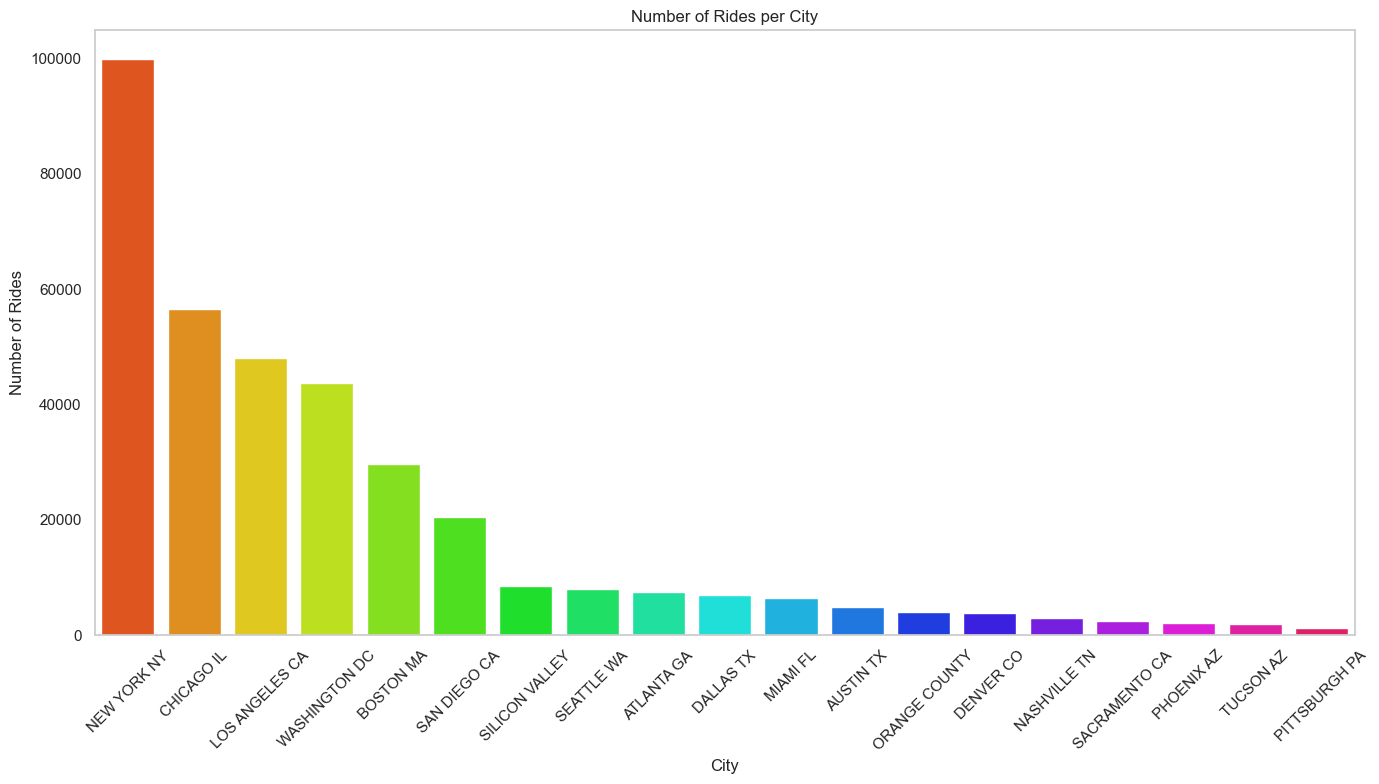

In [38]:
# Get sorted cities
city_order = cleaned_df['City'].value_counts().index

# Generate a color palette (as long as the number of unique cities)
colors = sns.color_palette('hsv', len(city_order))  # You can also try 'Set3', 'Paired', etc.

# Create the plot
plt.figure(figsize=(14, 8))
sns.countplot(
    x='City',
    data=cleaned_df,
    order=city_order,
    palette=colors
)

# Formatting
plt.title('Number of Rides per City')
plt.xlabel('City')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)
plt.show()

#### The above analysis shows that most Urban cities are being patronised by cab users with New York having the largest number of counts.
#### Let us group these cities according to the two different cab companies 

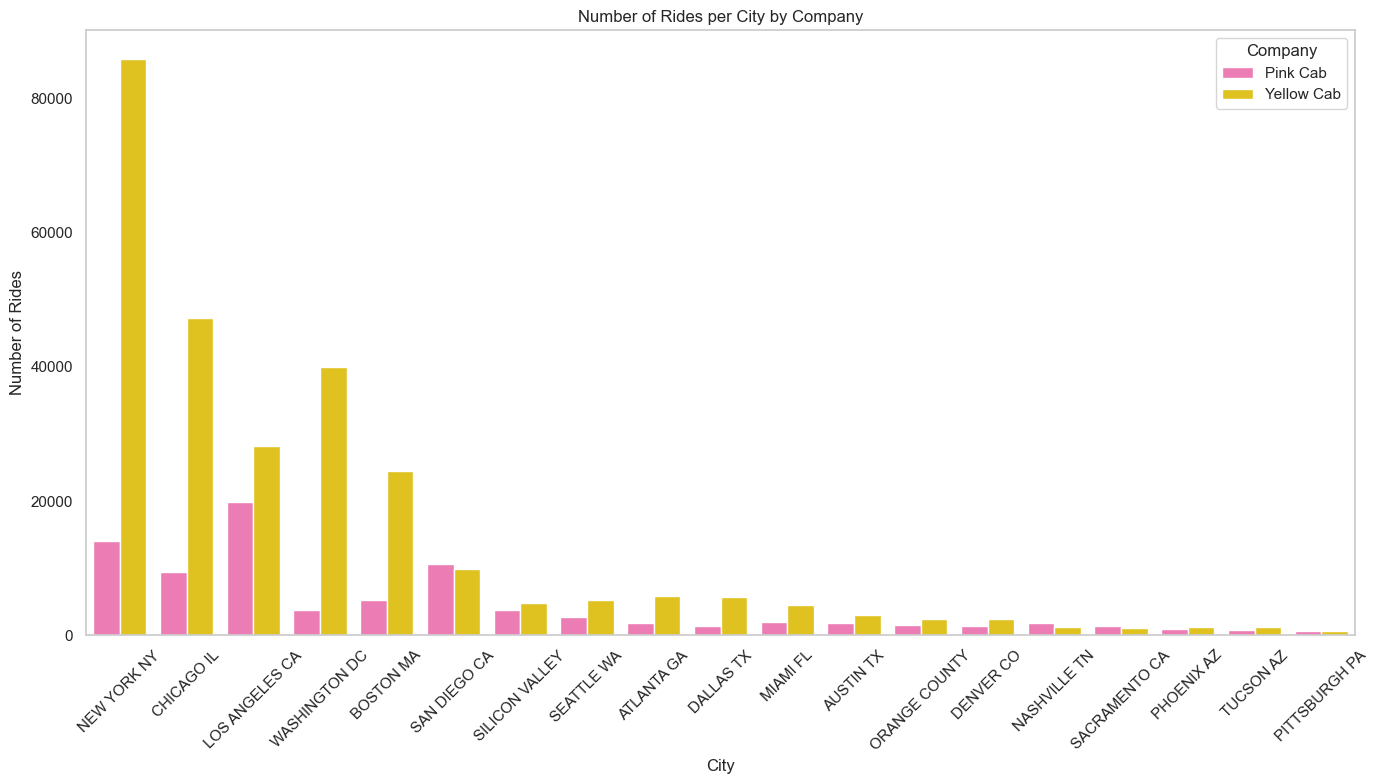

In [39]:
# Define colour mapping for each company
color_mapping = {"Pink Cab": "hotpink", "Yellow Cab": "gold"}  # 'gold' works better than 'yellow' on white backgrounds

# Create the plot
plt.figure(figsize=(14, 8))

# Plot according to company colours
sns.countplot(
    x='City',
    hue='Company',
    data=cleaned_df,
    order=cleaned_df['City'].value_counts().index,
    palette=color_mapping
)

# Labels and styling
plt.title('Number of Rides per City by Company')
plt.xlabel('City')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.legend(title='Company')
plt.tight_layout()
plt.grid(False)
plt.show()

#### From the graphs, there is a noticeable high value for the number of rides for New York and other Urban regionswith yellow cab company having very high rates compared to pink cab company.

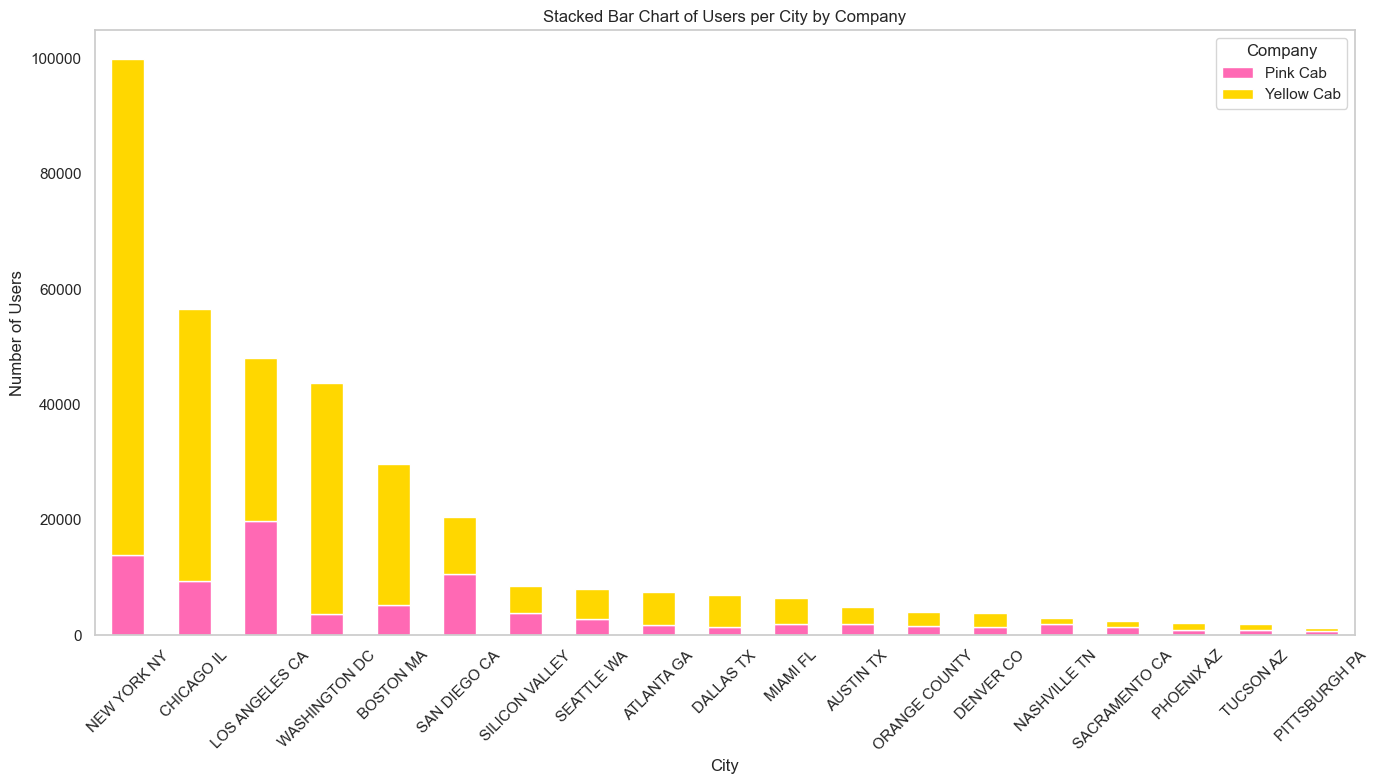

In [40]:
# Group and pivot
user_counts = cleaned_df.groupby(['City', 'Company'])['Customer ID'].count().reset_index()
pivot_user_counts = user_counts.pivot(index='City', columns='Company', values='Customer ID').fillna(0)

# Sort cities by total rides
pivot_user_counts['Total'] = pivot_user_counts.sum(axis=1)
pivot_user_counts = pivot_user_counts.sort_values('Total', ascending=False)

# Plot
pivot_user_counts.drop(columns='Total').plot(kind='bar', stacked=True, figsize=(14, 8), color=['hotpink', 'gold'])
plt.title('Stacked Bar Chart of Users per City by Company')
plt.xlabel('City')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.legend(title='Company')
plt.show()

### Hypothesis 2

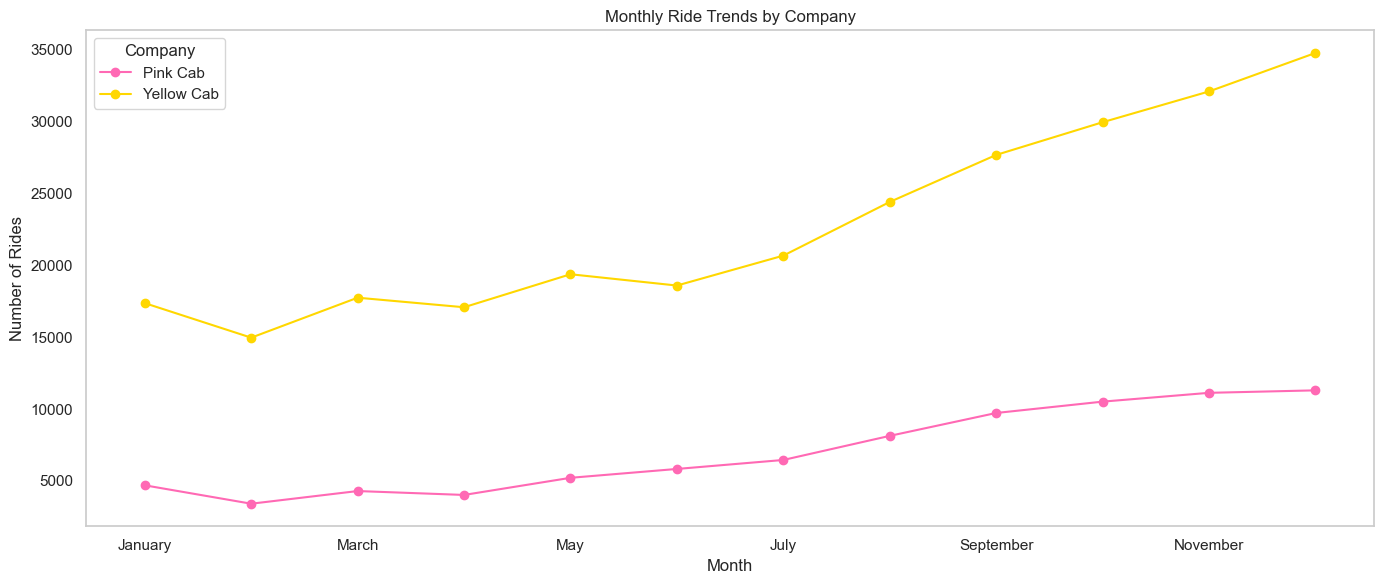

In [41]:
# Define month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Set month column as categorical with proper order
cleaned_df['Travel Month'] = pd.Categorical(cleaned_df['Travel Month'], categories=month_order, ordered=True)

# Group by month and company
monthly_trends = cleaned_df.groupby(['Travel Month', 'Company']).size().unstack().fillna(0)

# Plot with custom colors
monthly_trends.plot(kind='line', figsize=(14, 6), marker='o', color=['hotpink', 'gold'])

# Add chart details
plt.title('Monthly Ride Trends by Company')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.grid(False)
plt.legend(title='Company')
plt.tight_layout()
plt.show()

#### From the above graph, there seem to be a gradual increase in the number of rides from April to August and a bit of constant values from September to December for the pink cab. As for the yellow cab, there are some few staggers from January to June and a noticeable increase from June to December.
#### So we can say seasonal variations affect usuage in both cab companies

### Hypothesis 3

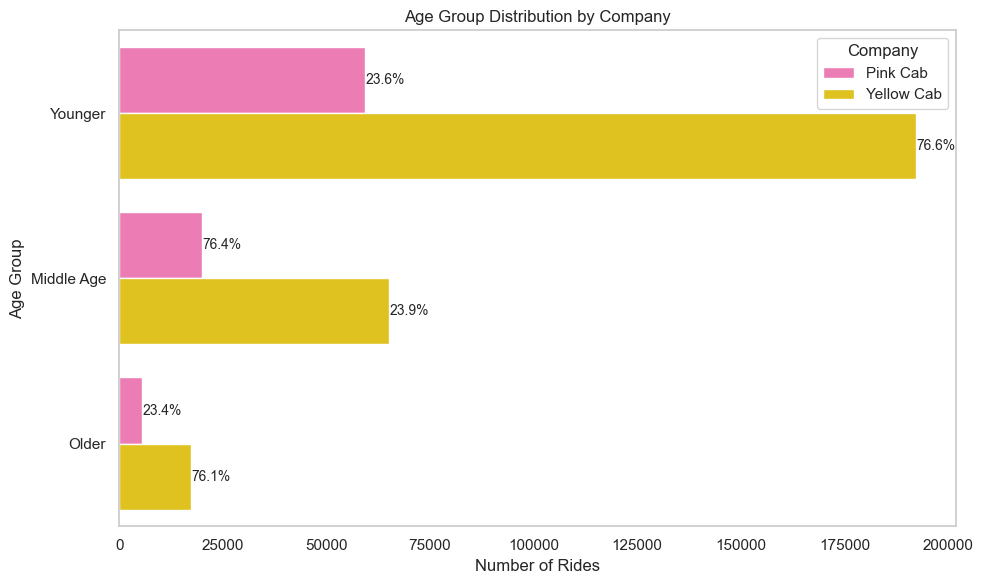

In [42]:
# Count number of rides by Age Group and Company
age_group_distribution = cleaned_df.groupby(['Age Group', 'Company'])['Customer ID'].count().reset_index()

# Rename for clarity
#age_group_distribution.rename(columns={'customer_id': 'Number of Rides'}, inplace=True)

# Calculate percentage within each age group
age_group_distribution['Percentage'] = age_group_distribution.groupby('Age Group')['Customer ID'].apply(
    lambda x: round((x / x.sum()) * 100, 1)
)

# Plot - horizontal version
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=age_group_distribution,
    y='Age Group',
    x='Customer ID',
    hue='Company',
    palette={'Pink Cab': 'hotpink', 'Yellow Cab': 'gold'},
    orient='h'
)

# Add percentage labels
for bar, perc in zip(ax.patches, age_group_distribution['Percentage']):
    width = bar.get_width()
    ax.text(
        width + 100,  # adjust label position
        bar.get_y() + bar.get_height() / 2,
        f'{perc}%',
        va='center',
        fontsize=10
    )

plt.title('Age Group Distribution by Company')
plt.ylabel('Age Group')
plt.xlabel('Number of Rides')
plt.legend(title='Company')
plt.grid(False)
plt.tight_layout()
plt.show()


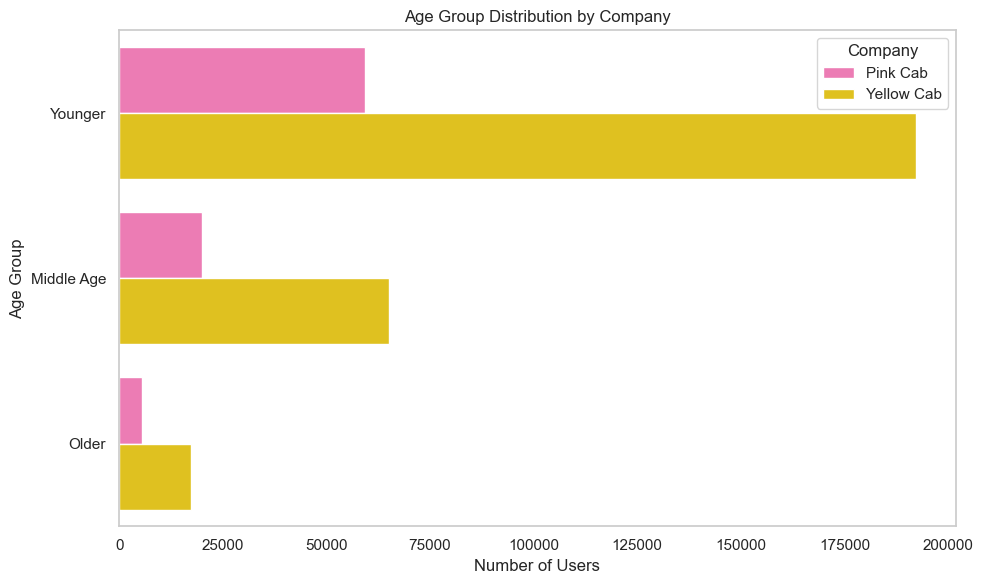

In [43]:
# Count number of rides by Age Group and Company
age_group_distribution = cleaned_df.groupby(['Age Group', 'Company'])['Users'].count().reset_index()

# Rename for clarity
#age_group_distribution.rename(columns={'customer_id': 'Number of Rides'}, inplace=True)

# Calculate percentage within each age group
#age_group_distribution['Percentage'] = age_group_distribution.groupby('Age Group')['Users'].apply(
#    lambda x: round((x / x.sum()) * 100, 1)
#)

# Plot - horizontal version
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=age_group_distribution,
    y='Age Group',
    x='Users',
    hue='Company',
    palette={'Pink Cab': 'hotpink', 'Yellow Cab': 'gold'},
    orient='h'
)

# Add percentage labels
#for bar, perc in zip(ax.patches, age_group_distribution['Percentage']):
#    width = bar.get_width()
#    ax.text(
#        width + 100,  # adjust label position
#        bar.get_y() + bar.get_height() / 2,
#        f'{perc}%',
#        va='center',
#        fontsize=10
#    )

plt.title('Age Group Distribution by Company')
plt.ylabel('Age Group')
plt.xlabel('Number of Users')
plt.legend(title='Company')
plt.grid(False)
plt.tight_layout()
plt.show()


#### The plot above shows the younger age group tend to patronise the services of the both cab companies compared to other age groups with the yellow cab still dorminating even across all demographics.
#### NB: The number of rides equates the number of users

### Hypothesis 4

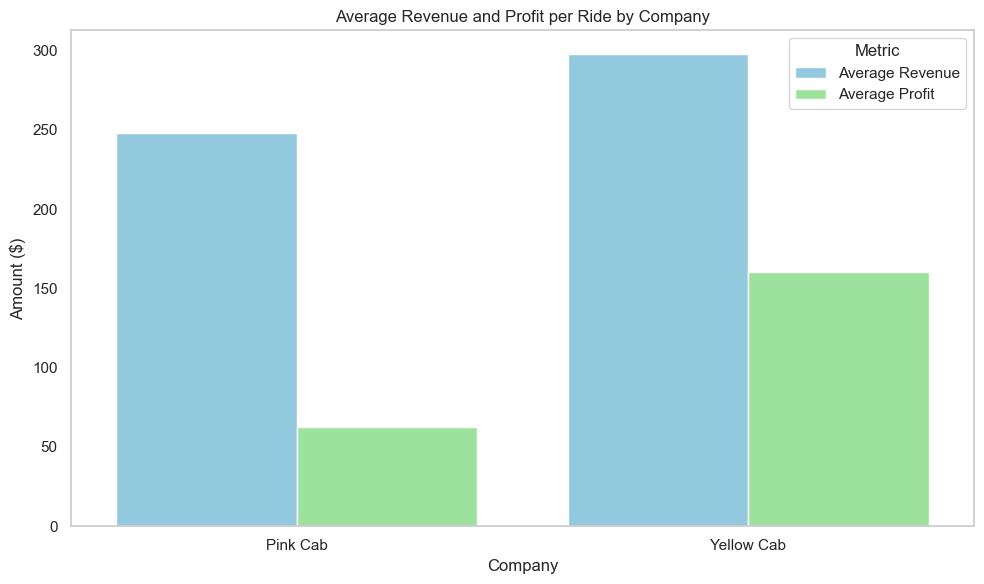

In [44]:
# Group by Company and calculate averages
avg_metrics = cleaned_df.groupby('Company')[['Cost of Trip', 'Profit']].mean().reset_index()

# Rename columns for clarity
avg_metrics.rename(columns={
    'Cost of Trip': 'Average Revenue',
    'Profit': 'Average Profit'
}, inplace=True)

# Melt dataframe for easy plotting
avg_melted = avg_metrics.melt(id_vars='Company', var_name='Metric', value_name='Amount')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=avg_melted,
    x='Company',
    y='Amount',
    hue='Metric',
    palette=['skyblue', 'lightgreen']
)

plt.title('Average Revenue and Profit per Ride by Company')
plt.ylabel('Amount ($)')
plt.xlabel('Company')
plt.grid(False)
plt.tight_layout()
plt.show()


#### From the above analysis, it is visisble that the yellow cab is doing so well in terms of average revenue and average profit. It brings profit of slightly more than half its revenue which is quite good.
#### The average percentage profit is viewed below to give a clearer picture of what share each company brings.

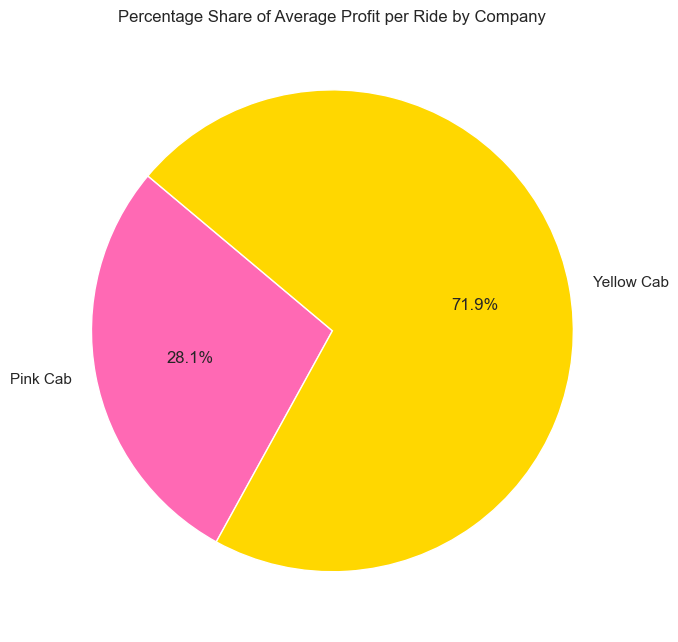

In [45]:
# Get total average profit per company
avg_profit = cleaned_df.groupby('Company')['Profit'].mean()

# Plot pie chart
plt.figure(figsize=(7, 7))
colors = ['hotpink', 'gold']
avg_profit.plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=140)

plt.title('Percentage Share of Average Profit per Ride by Company')
plt.ylabel('')  # hide y-label
plt.tight_layout()
plt.show()


### Hypothesis 5

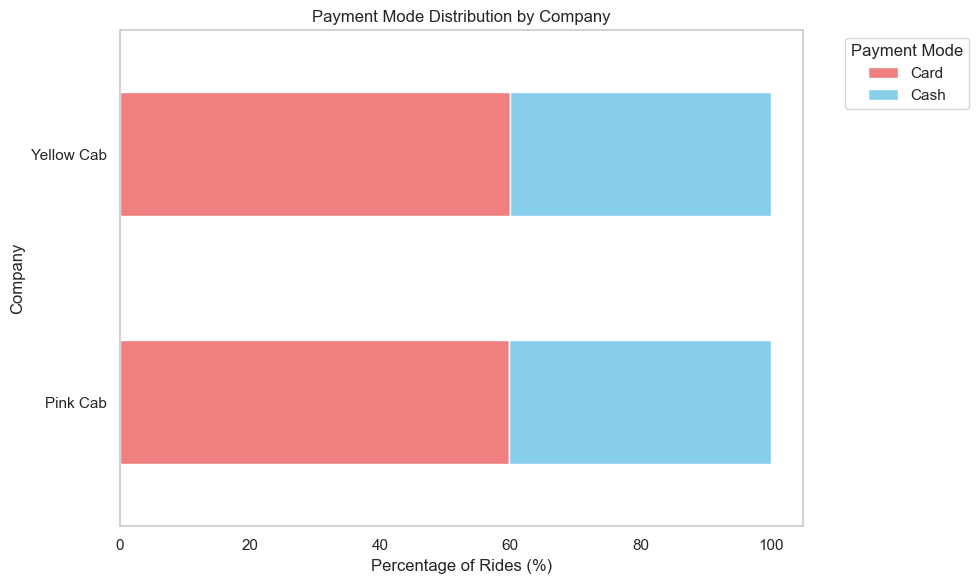

In [46]:
# Group and calculate percentage distribution of payment modes per company
payment_mode_percent = cleaned_df.groupby(['Company', 'Payment_Mode'])['Customer ID'].count().reset_index()
payment_mode_percent = payment_mode_percent.pivot(index='Company', columns='Payment_Mode', values='Customer ID')
payment_mode_percent = payment_mode_percent.div(payment_mode_percent.sum(axis=1), axis=0) * 100  # Convert to percentages

# Plot
payment_mode_percent.plot(kind='barh', stacked=True, figsize=(10, 6), color=['lightcoral', 'skyblue', 'khaki', 'mediumseagreen'])

plt.title('Payment Mode Distribution by Company')
plt.xlabel('Percentage of Rides (%)')
plt.ylabel('Company')
plt.legend(title='Payment Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
plt.tight_layout()
plt.show()


#### The above chart shows the even distribution of payment mode. It is seen that for both companies, users tend to use more of card pament compared to cash which is normal and quite a safer mode of transaction.

### Hypothesis 6

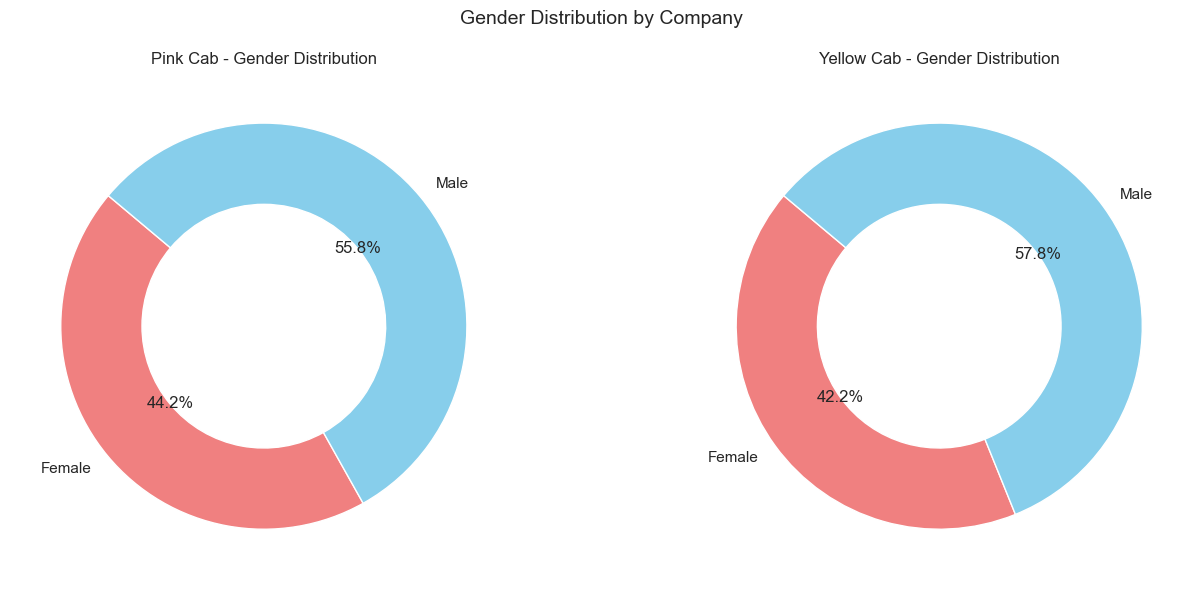

In [47]:
# Prepare data
gender_counts = cleaned_df.groupby(['Company', 'Gender'])['Customer ID'].count().reset_index()
gender_counts = gender_counts.pivot(index='Company', columns='Gender', values='Customer ID')

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

colors = ['lightcoral', 'Skyblue']

for i, company in enumerate(gender_counts.index):
    sizes = gender_counts.loc[company]
    axes[i].pie(sizes, labels=sizes.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops=dict(width=0.4))
    axes[i].set_title(f'{company} - Gender Distribution')

plt.suptitle('Gender Distribution by Company', fontsize=14)
plt.tight_layout()
plt.show()

#### In this case, for both companies, the male gender make use of the cab services with about 13% more compared to the female gender.

### In addition

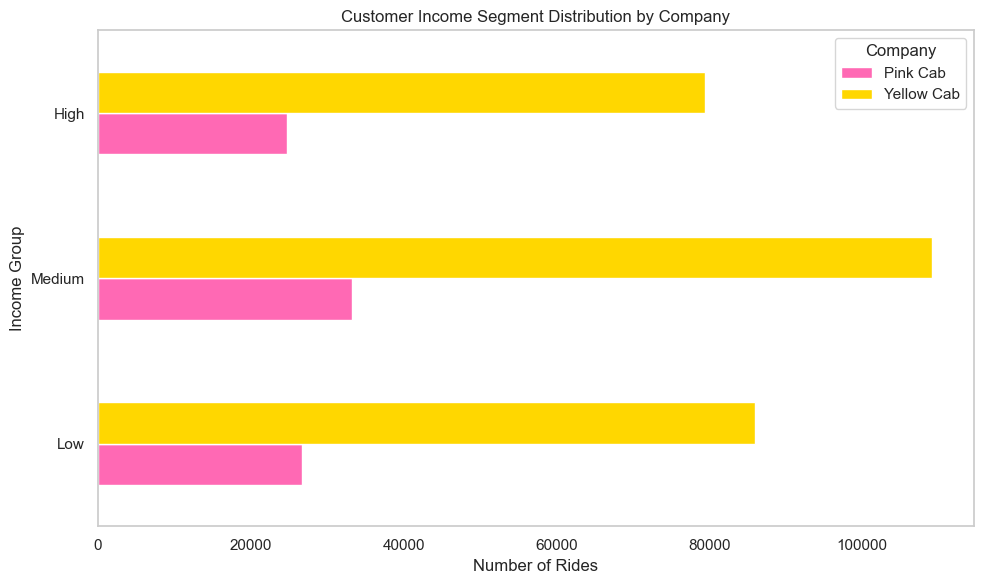

In [48]:
# Define income bins and labels (you can adjust these ranges as needed)
#income_bins = [0, 30000, 60000, 100000, 150000, float('inf')]
#income_labels = ['<30k', '30k-60k', '60k-100k', '100k-150k', '150k+']

# Create a new income group column
#cleaned_df['Income Group'] = pd.cut(cleaned_df['Income'], bins=income_bins, labels=income_labels, right=False)

# Group by income group and company
income_segment = cleaned_df.groupby(['Income Group', 'Company'])['Customer ID'].count().reset_index()
income_segment.rename(columns={'Customer ID': 'Number of Rides'}, inplace=True)

# Plot as a horizontal bar chart
pivot_income = income_segment.pivot(index='Income Group', columns='Company', values='Number of Rides').fillna(0)
pivot_income.plot(kind='barh', stacked=False, color={'Pink Cab': 'hotpink', 'Yellow Cab': 'gold'}, figsize=(10, 6))

plt.title('Customer Income Segment Distribution by Company')
plt.xlabel('Number of Rides')
plt.ylabel('Income Group')
plt.legend(title='Company')
plt.grid(False)
plt.tight_layout()
plt.show()

#### The above graph shows that the group with the medium income eaners patronise both companies more compared to all other income group with yellow cab taking the lead.
#### Same results are gotten when further grouped by age group.

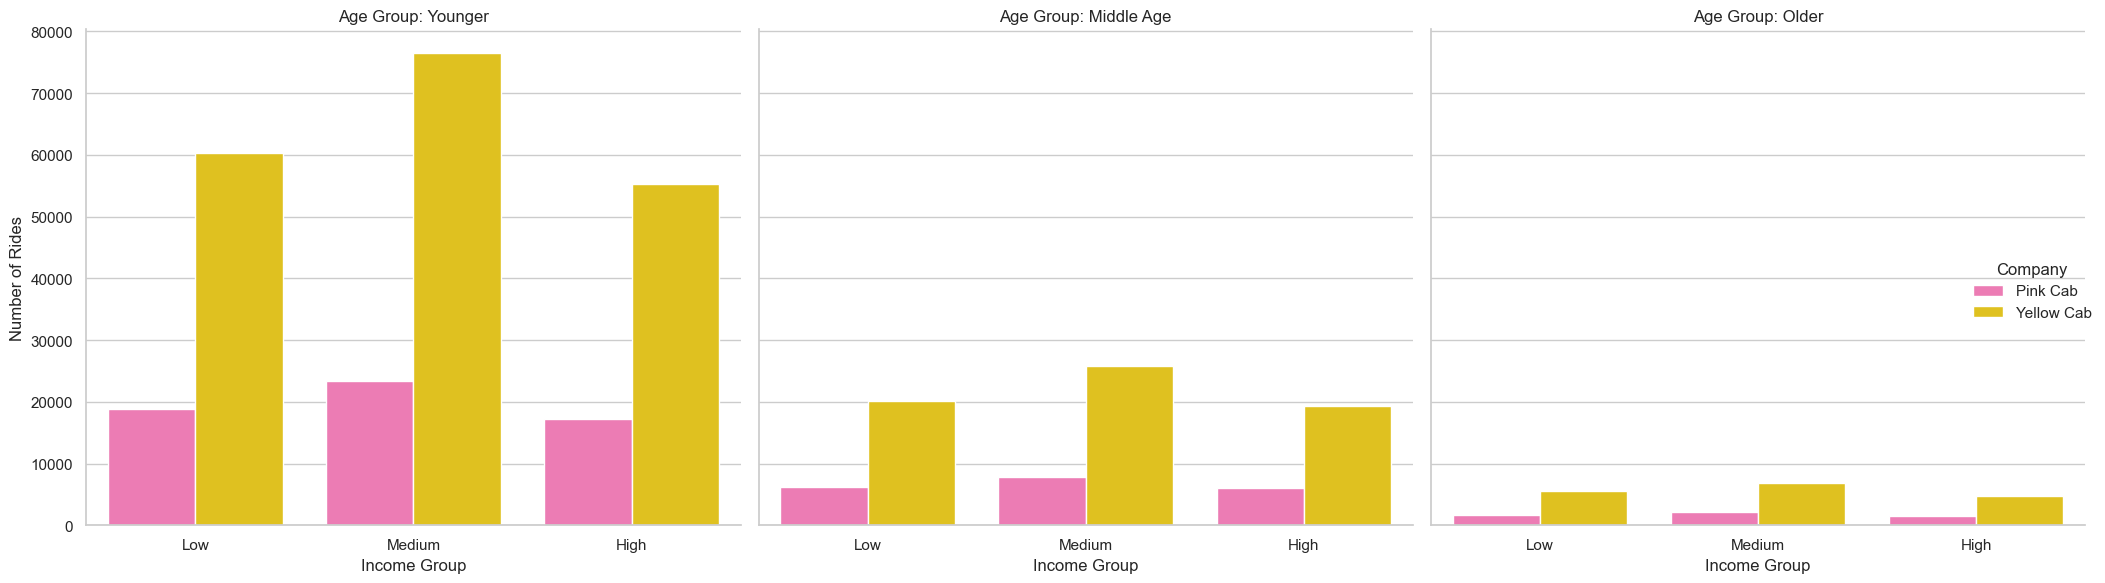

In [49]:
# Ensure Income Group column exists
#income_bins = [0, 30000, 60000, 100000, 150000, float('inf')]
#income_labels = ['<30k', '30k-60k', '60k-100k', '100k-150k', '150k+']
#cleaned_df['Income Group'] = pd.cut(cleaned_df['Income'], bins=income_bins, labels=income_labels, right=False)

# Group data
income_age = cleaned_df.groupby(['Income Group', 'Age Group', 'Company'])['Customer ID'].count().reset_index()
income_age.rename(columns={'Customer ID': 'Number of Rides'}, inplace=True)

# Plot
g = sns.catplot(
    data=income_age,
    kind='bar',
    x='Income Group',
    y='Number of Rides',
    hue='Company',
    col='Age Group',
    palette={'Pink Cab': 'hotpink', 'Yellow Cab': 'gold'},
    height=6,
    aspect=1.1
)

g.set_titles('Age Group: {col_name}')
g.set_axis_labels('Income Group', 'Number of Rides')
g._legend.set_title('Company')
plt.tight_layout()
plt.show()

#### The above graph shows that the group with the medium income eaners patronise both companies more compared to all other income group with yellow cab taking the lead.

### Summary of the Hypothesis
#### 1) Cab usage are highly concenterated in Major Cities. This could be due to high population which could lead to increase in demand.
#### 2) From the visualistion on monthly trends, its seen that most people travel more during the holiday period as we can view a peak during May and a progressive increase from June to December especially for the Yellow Cab companies.
#### 3) Based on the analysis, both companies attract same age group. In essense, the younger adults tend to travel more with cabs. In this case, they travel more with the Yellow Cab company.
#### 4) Overall, the Yellow Cab company is more profitable than the Pink Cab company.
#### 5) Payment distribution is same between both companies a users tend to make use of card payment compared to cash.
#### 6) Based on th analysis, it is shown that males patronise both companies' services than the females. In actual sense, could this be true? Studies have shown that females make more cab or taxi trips compared to males.

### General Recomendations
#### Both Cab companies should continue to invest in Cities where they dominate especially for the Yellow Cab Company.
#### Rebrand or market differently to tap into the underrepresented age groups like the Older age group.
#### More investigation should be made into why one company has higher profit margin than the other. Could it be due to better optimisation, fewer discounts, higher pricing and so on. The lessons learnt could be applied to the other Cab company.
#### For the underrepresented gender group, special campaign offers could be introduced to balance usage.
#### On the aspect of seasonal strategy, promotions and marketing campaigns can be introduced during high traffic months while maintenance and app updates could be planned during low demand months.

### References
#### Siddq, F. and Taylor, B.D. (2024) 'A gendered perspective on ride-hail use in Los Angeles, USA', Transportation Research Interdisciplinary Perspectives, 23 https://doi.org/10.1016/j.trip.2023.100938
#### GOV.UK (2022) 'Taxi and private hire vehicle statistics' https://www.gov.uk